In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([7,5,7,3,4,1,0,2,8,6,5,3],float)
y = np.array([5,7,7,3,6,4,0,2,7,8,5,7],float)

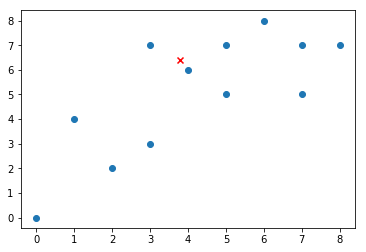

In [3]:
plt.scatter(x,y)
plt.scatter([3.8],[6.4],c='r',marker='x')

# cluster

In [4]:
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster2 = np.random.uniform(3.5,4.5,(2,10))

In [5]:
cluster1

array([[0.79544811, 1.35944193, 1.44358605, 0.97664299, 0.52460296,
        0.92449952, 0.77494905, 0.69727159, 1.26935661, 1.17547938],
       [0.97151292, 1.44338452, 0.99860394, 1.45201924, 1.09334301,
        1.28509603, 1.40204365, 0.96378577, 1.47293753, 1.39251033]])

In [6]:
x = np.hstack((cluster1,cluster2)).T

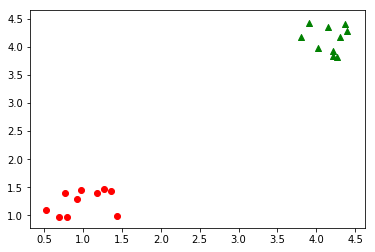

In [7]:
j=0
for i in x:
    if(j<10):
        plt.scatter(i[0],i[1],c='r',marker='o')
    else:
        plt.scatter(i[0],i[1],c='g',marker='^')
    j=j+1

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [9]:
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster2 = np.random.uniform(3.5,4.5,(2,10))
x = np.hstack((cluster1,cluster2)).T

In [10]:
K = range(1,10)
meandistortions = []

In [11]:
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    meandistortions.append(sum(np.min(cdist(x,kmeans.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

Text(0.5,1,'selecting k with the elbow method')

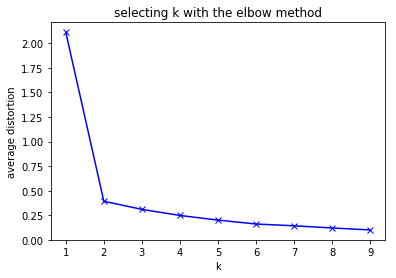

In [12]:
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('average distortion')
plt.title('selecting k with the elbow method')

# k mean digits

In [13]:
from sklearn import datasets

In [14]:
digits = datasets.load_digits()

In [15]:
print (digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [16]:
print (digits.target)

[0 1 2 ... 8 9 8]


In [17]:
print (digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [18]:
print (digits.data.shape)

(1797, 64)


In [19]:
print (digits.target.shape)

(1797,)


In [20]:
print (np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


In [21]:
print (digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


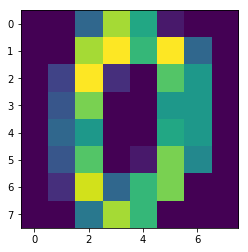

In [22]:
plt.imshow(digits.data[0].reshape(8,8))

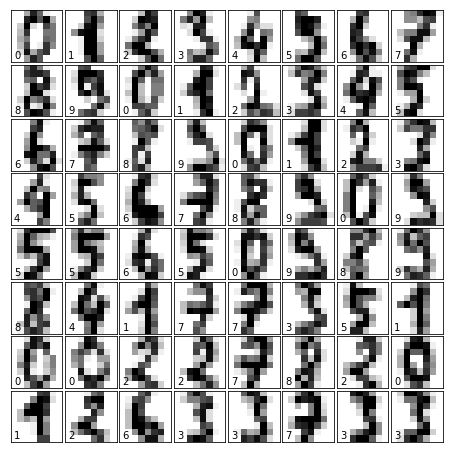

In [25]:
# fig size (width,height) in inches
fig = plt.figure(figsize=(6,6))

fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

In [26]:
from sklearn.preprocessing import scale

In [27]:
data = scale(digits.data)

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
x_train,x_test,y_train,y_test,images_train,images_test = train_test_split(data,digits.target,digits.images,test_size=0.25,random_state=42)

In [32]:
print (x_train.shape)

(1347, 64)


In [33]:
from sklearn import cluster

In [35]:
clf = cluster.KMeans(init='k-means++',n_clusters=10,random_state=42)

In [36]:
clf.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
y_pred = clf.predict(x_test)

In [38]:
print (y_pred[:100])

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]


In [39]:
print (y_test[:100])

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


In [42]:
digits.data[0].reshape(-1,64)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])